Importing the dependencies 


*   numpy is used to handle the multidimensional arrays
*   pandas is used to handle the data in the form of dataframes(structured data)
*   train_test.split is used to split the data in two different datasets , one is for training the model and other for testing .
*   Logistic Regression is the model in which we fetch the data for training. We used this model because it is apt for binary classification . In this case, We have two option either heart diseased or not.
*   accuracy_score is used to test how well our model is working.







In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from operator import add
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'


Data collection & Data Pre-processing

In [3]:
## loading csv data into pandas dataframe
raw_data=pd.read_csv('heart.csv')


In [4]:
## printing the data
raw_data.head(20)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [5]:
## getting the number of rows and columns
raw_data.shape

(303, 14)

In [6]:
## getting the detailed information about dataset
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
## checking for null values
raw_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

C:\Users\saidi\AppData\Local\Temp\ipykernel_24860\3391735535.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  raw_data.hist(ax = ax)


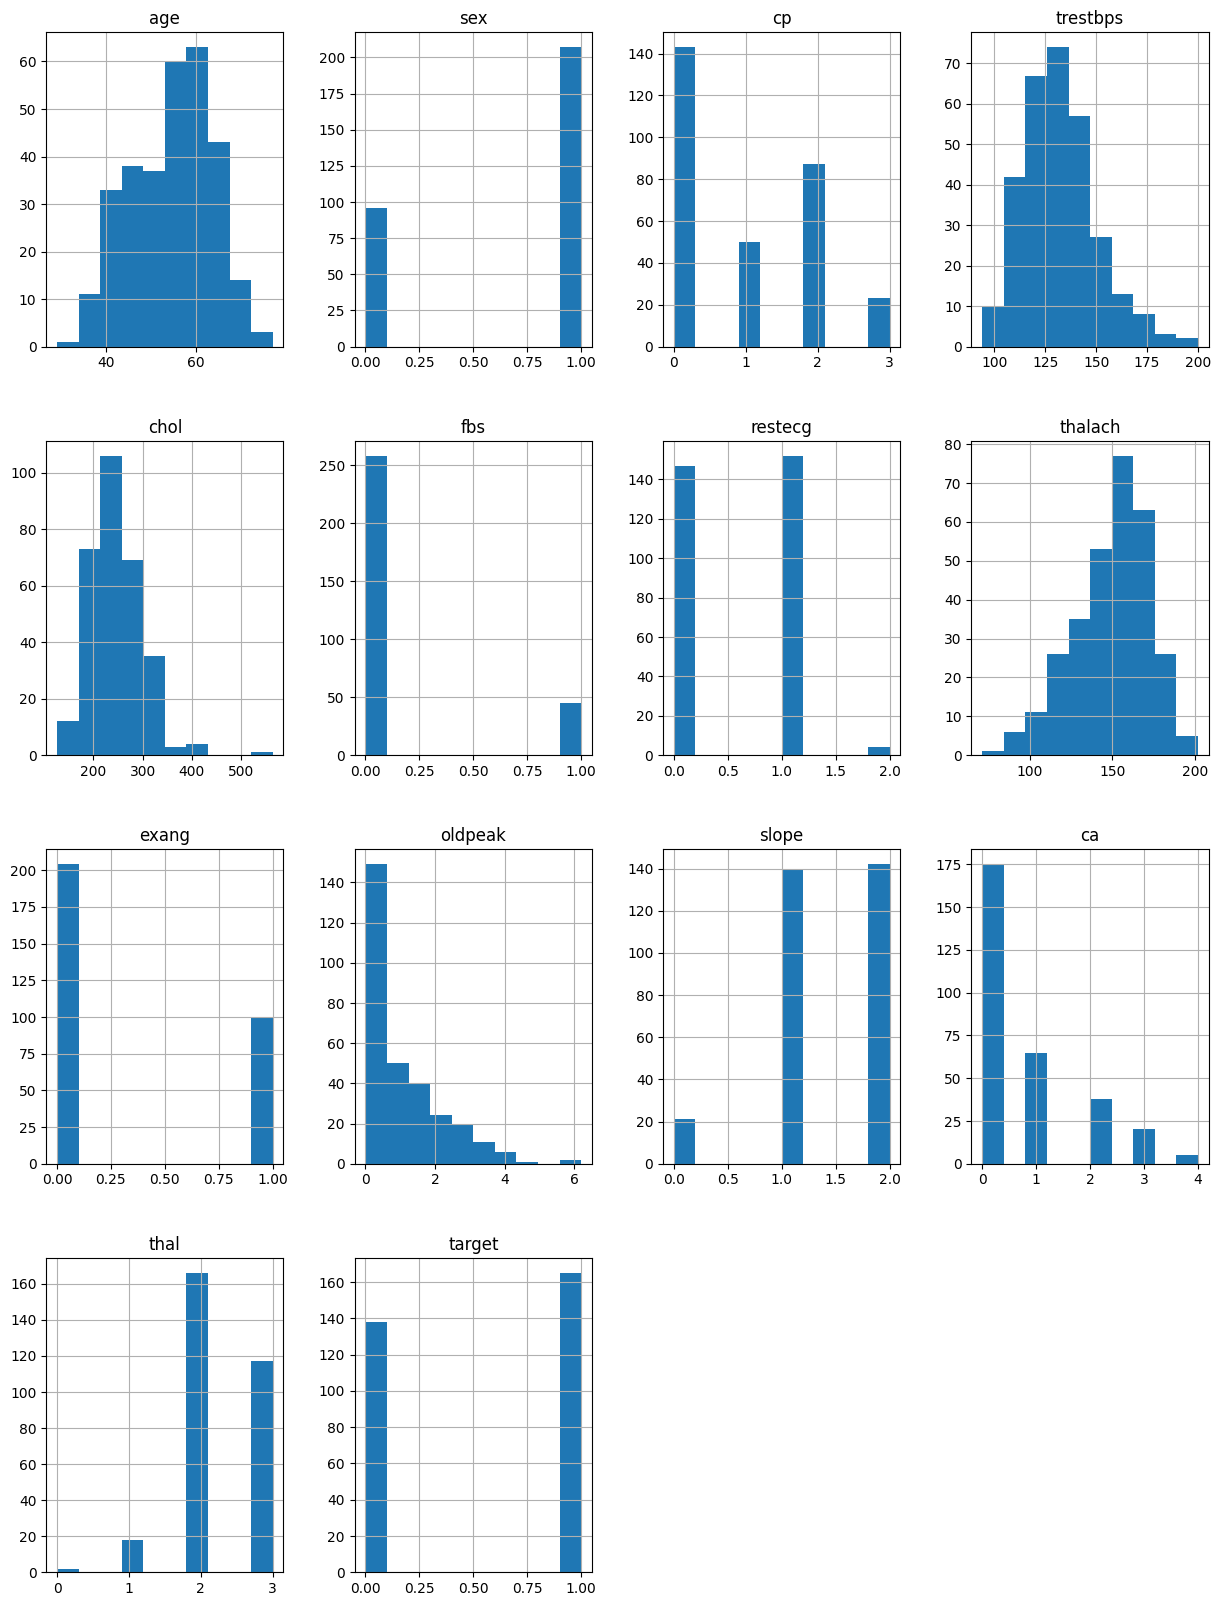

In [8]:
# plot histogram to see the distribution of the data
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
raw_data.hist(ax = ax)
plt.show()

In [9]:
## getting detailed statistical information about the dataset
raw_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
## checking the distribution of target column ( How many are suffereing from heart disease and how many are not)
raw_data['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

0 --> Represents non defective heart 

---
1 --> Represents defective heart

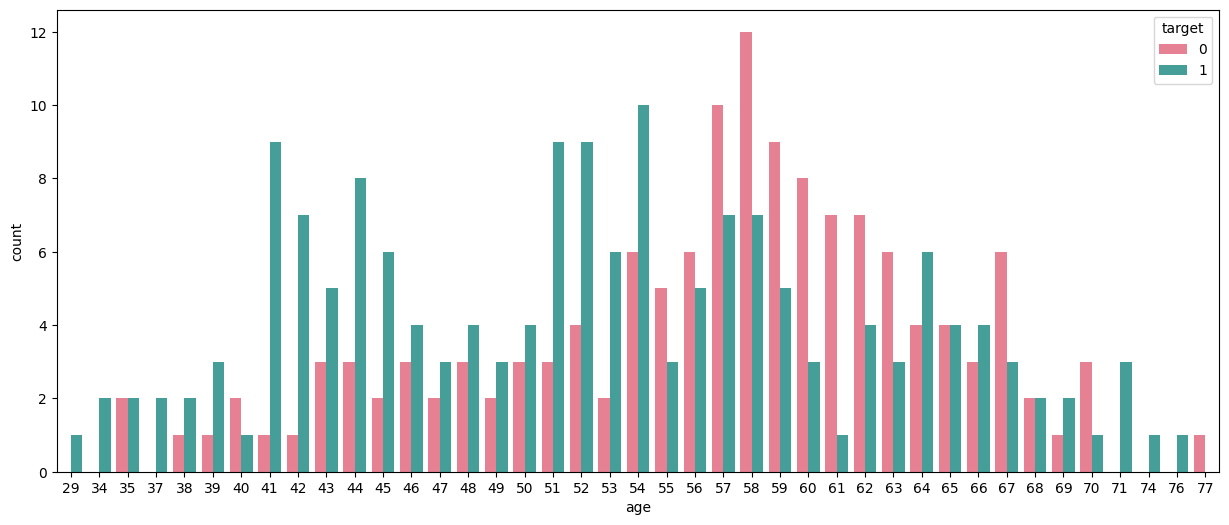

In [11]:
plt.figure(figsize=(15,6))
sns.countplot(x='age',data = raw_data, hue = 'target',palette='husl')
plt.show()

Checking how many values in Target column are of the type Int

In [12]:
raw_data['target'].map(type) == int

0      True
1      True
2      True
3      True
4      True
       ... 
298    True
299    True
300    True
301    True
302    True
Name: target, Length: 303, dtype: bool

In [13]:

def stacked_barchart(data, title = None, ylabel = None, xlabel = None):
    default_colors = ['#008080', '#5f3c41', '#219AD8']
    # From raw value to percentage
    totals = data.sum(axis=1)
    bars = ((data.T / totals) * 100).T
    r = list(range(data.index.size))

    # Plot
    barWidth = 0.95
    names = data.index.tolist()
    bottom = [0] * bars.shape[0]

    # Create bars
    color_index = 0
    plots = []
    for bar in bars.columns:
        plots.append(plt.bar(r, bars[bar], bottom=bottom, color=default_colors[color_index], edgecolor='white', width=barWidth))
        bottom = list(map(add, bottom, bars[bar]))
        color_index = 0 if color_index >= len(default_colors) else color_index + 1

    # Custom x axis
    plt.title(title)
    plt.xticks(r, names)
    plt.xlabel(data.index.name if xlabel is None else xlabel)
    plt.ylabel(data.columns.name if ylabel is None else ylabel)
    ax = plt.gca()
        
    y_labels = ax.get_yticks()
    ax.set_yticklabels([str(y) + '%' for y in y_labels])

    flat_list = [item for sublist in data.T.values for item in sublist]
    for i, d in zip(ax.patches, flat_list):
        data_label = str(d) + " (" + str(round(i.get_height(), 2)) + "%)"
        ax.text(i.get_x() + 0.45, i.get_y() + 5, data_label, horizontalalignment='center', verticalalignment='center', fontdict = dict(color = 'white', size = 20))

    for item in ([ax.title]):
        item.set_fontsize(27)
        
    for item in ([ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(24)
    
    legend = ax.legend(plots, bars.columns.tolist(), fancybox=True)
    plt.setp(legend.get_texts(), fontsize='20')

C:\Users\saidi\AppData\Local\Temp\ipykernel_24860\960866110.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(y) + '%' for y in y_labels])


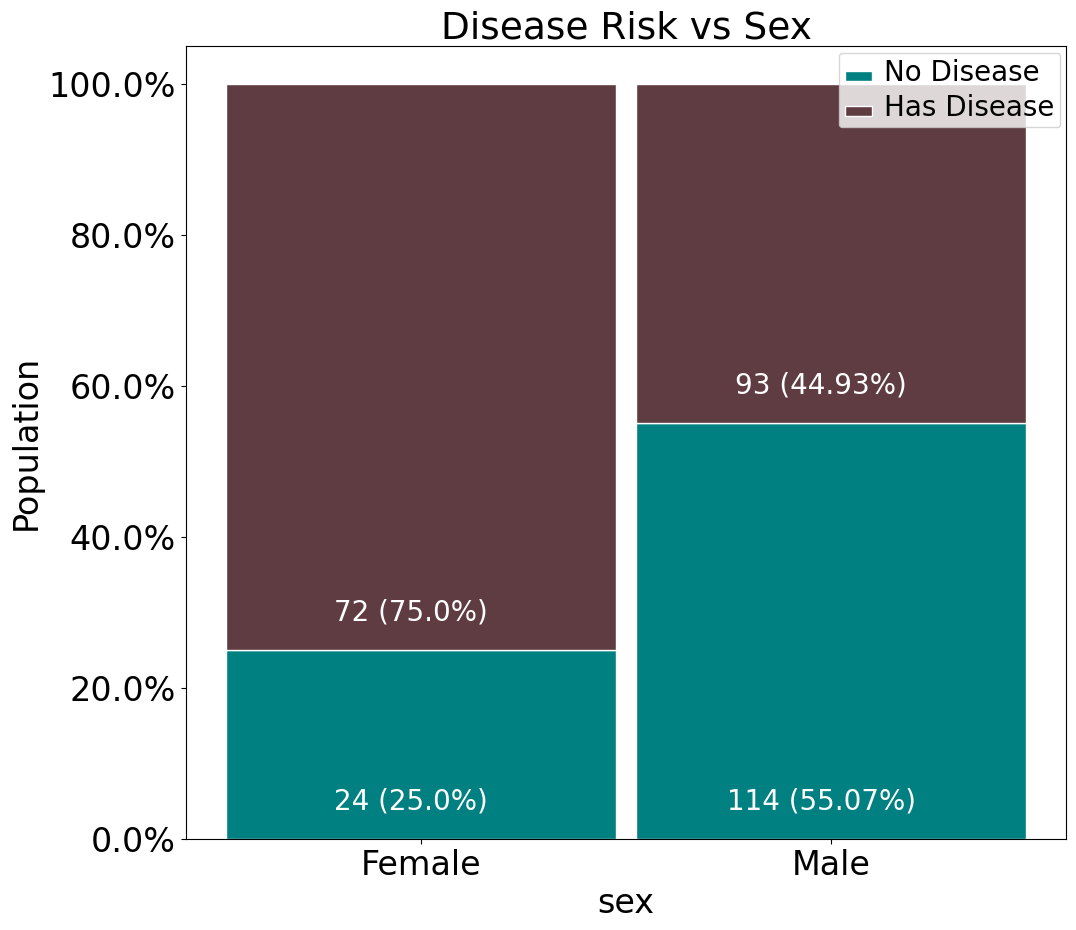

In [14]:
fig = plt.gcf()
fig.set_size_inches(25, 35)
grid_rows = 3
grid_cols = 2

#draw sex vs disease outcome
plt.subplot(grid_rows, grid_cols, 1)
temp = raw_data[['sex','target']].groupby(['sex','target']).size().unstack('target')
temp.rename(index={0:'Female', 1:'Male'}, columns={0:'No Disease', 1:'Has Disease'}, inplace = True)
stacked_barchart(temp, title = 'Disease Risk vs Sex', ylabel = 'Population')


In [15]:
raw_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


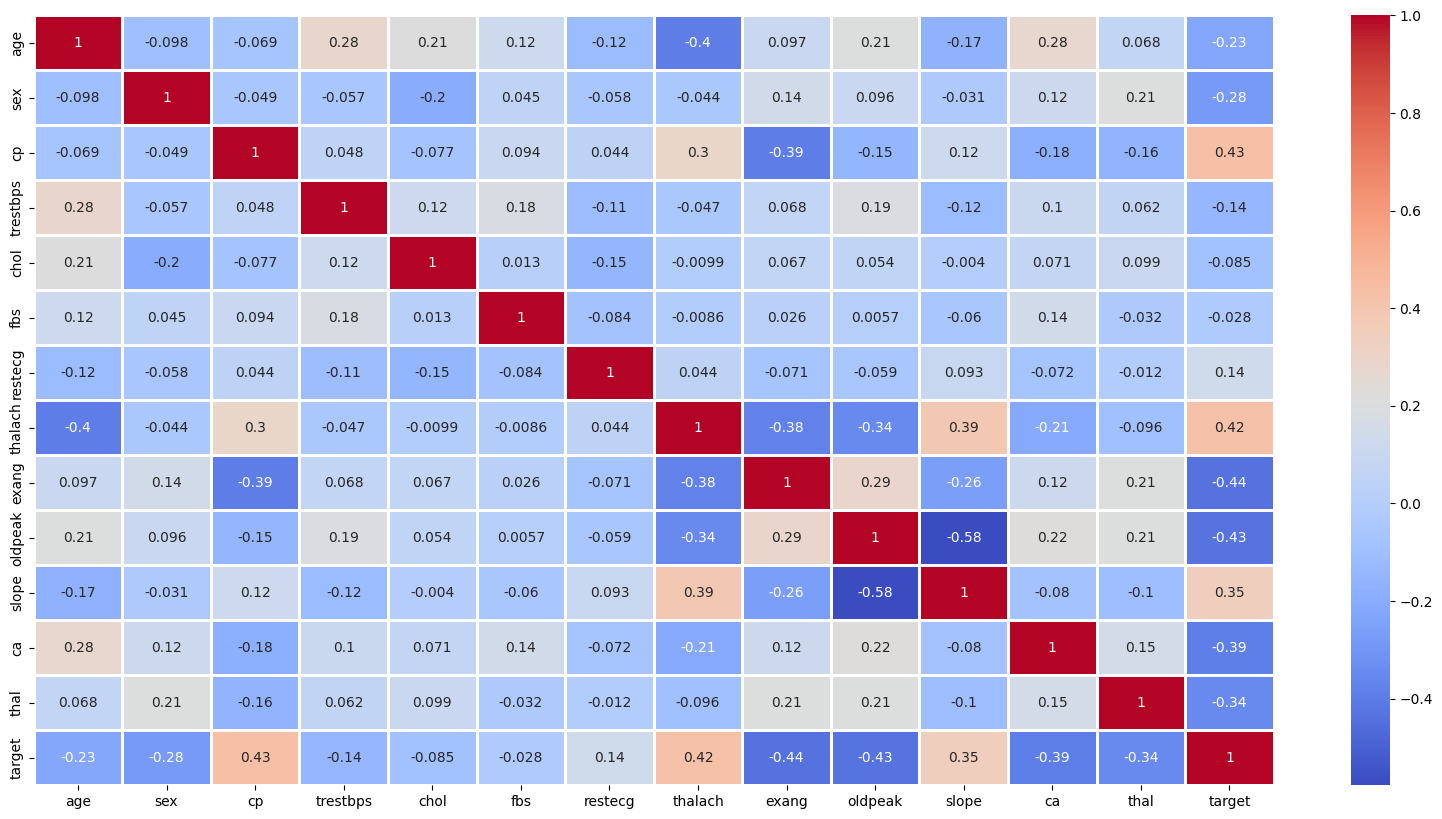

In [16]:
#plotting the correlation matrix
plt.figure(figsize=(20,10))
sns.heatmap(raw_data.corr(),annot=True,cmap='coolwarm',linewidths=2)
plt.show()

Splitting the Target & Features as two seperate variables X and Y

In [17]:
## splitting the columns in two diffrent variables
X=raw_data.drop(columns='target', axis=1)
Y=raw_data['target']

In [18]:
print(X)
print(Y)


     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak   
0     63    1   3       145   233    1        0      150      0      2.3  \
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0    

Splitting the dataframe into two groups ( Training & Testing)


In [19]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

In [20]:
print(X.shape,X_train.shape,X_test.shape)

(303, 13) (242, 13) (61, 13)


In [21]:
print(Y.shape,Y_train.shape,Y_test.shape)

(303,) (242,) (61,)


Training the Model 
We are choosing Logistic Regression model for training the dataset as it is good for binary classification.

[Detailed Explanation](https://towardsdatascience.com/logistic-regression-detailed-overview-46c4da4303bc)

In [22]:
model=LogisticRegression()


In [23]:
model.fit(X_train,Y_train)

c:\Users\saidi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Evaluation of Model

In [24]:
# Evaluation of Model using accuracy_score function from sklearn library

## accuracy score on training data
training_prediction=model.predict(X_train)
training_accuracy_score=accuracy_score(training_prediction,Y_train)


In [25]:
print(training_accuracy_score)

0.8512396694214877


In [26]:
## accuracy score on testing data
testing_prediction=model.predict(X_test)
testing_accuracy_score=accuracy_score(testing_prediction,Y_test)

In [27]:
print(testing_accuracy_score)

0.819672131147541


Here we have little difference in the accuracy score of training and testing data . So we can say that model is trained well . It is not over-fitted

### Predictive System




In [28]:
# Taking the input from user 64,1,3,110,211,0,0,144,1,1.8,1,0,2,1
print("Please enter the following detail")
input_data=(int(input("Age:-\n")),
            int(input("Gender:-\n0 for Female \n1 for male")),
            int(input("Chest Pain measurefrom 0-4\n0-->No Pain 4--> Severe pain:-\n")),
            int(input("Resting Blood Pressure value:-\n")),
            int(input("Cholestrol Value:-\n")),
            int(input("Fasting Blood Sugar:-\n")),
            int(input("Rest ECG:-\n")),
            int(input("Max Heart Rate:-\n")),
            int(input("Exercised induced Agina:-\n")),
            float(input("ST Depression:-\n")),
            int(input("The slope of the peak exercise ST segment:-\n")),
            int(input("Number of major vessels (0-3) colored by flourosopy:-\n")),
            int(input("Thalessemia Value:- \n thal: 3 = normal; 6 = fixed defect; 7 = reversable defect\n"))
            )

Please enter the following detail


In [29]:
print(input_data)

(12, 0, 2, 33, 1, 2, 2, 2, 1, 1.0, 1, 1, 1)


In [30]:
 input_data_as_numpy= np.asarray(input_data)

In [31]:
input_data_reshaped=input_data_as_numpy.reshape(1,-1)
prediction=model.predict(input_data_reshaped)
print(prediction)
if(prediction[0]==0):
    print(color.BOLD+color.GREEN+"\n\n*********************************************\nThe person's heart is healthy :)\n*********************************************\n\n"+color.END)
else:
    print(color.BOLD+color.RED+"\n\n*********************************************\nThe person is suffering from heart disease :(\n*********************************************\n\n"+color.END)

[0]


*********************************************
The person's heart is healthy :)
*********************************************




c:\Users\saidi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [32]:
#random forest classifier
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(X_train,Y_train)

RandomForestClassifier()

In [33]:
# Evaluation of Model using accuracy_score function from sklearn library
prediction=model.predict(X_train)
training_accuracy_score=accuracy_score(prediction,Y_train)
print(training_accuracy_score)

1.0


In [34]:
## accuracy score on testing data
prediction=model.predict(X_test)
testing_accuracy_score=accuracy_score(prediction,Y_test)
print(testing_accuracy_score)

0.7704918032786885


[[23  5]
 [ 6 27]]


<Axes: >

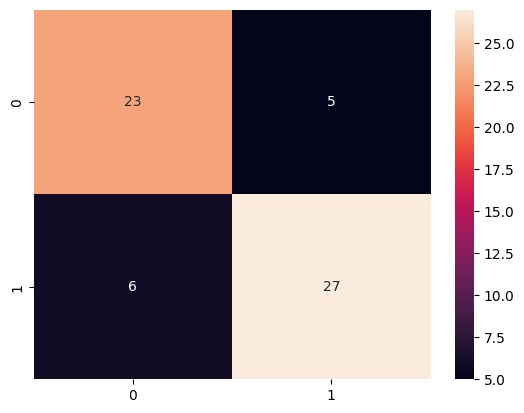

In [35]:
#plotting the confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,testing_prediction)
print(cm)
sns.heatmap(cm,annot=True)

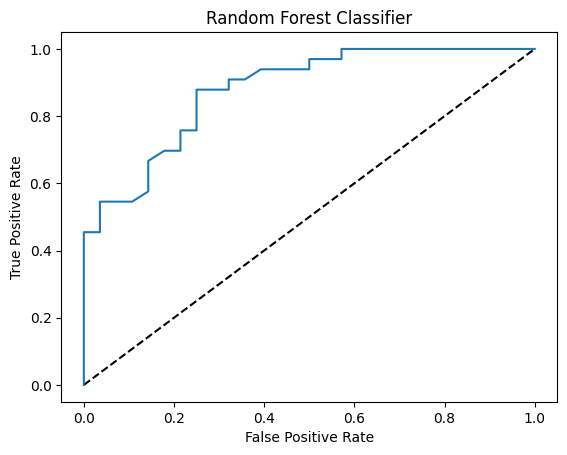

In [36]:
#roc curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
y_pred_prob=model.predict_proba(X_test)[:,1]
fpr,tpr,thresholds=roc_curve(Y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Random Forest Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest Classifier')
plt.show()

In [37]:
#decision tree classifier
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(X_train,Y_train)

DecisionTreeClassifier()

In [38]:
# Evaluation of Model using accuracy_score function from sklearn library
prediction=model.predict(X_train)
training_accuracy_score=accuracy_score(prediction,Y_train)
print(training_accuracy_score)

1.0


In [39]:
## accuracy score on testing data
prediction=model.predict(X_test)
testing_accuracy_score=accuracy_score(prediction,Y_test)
print(testing_accuracy_score)

0.819672131147541


[[23  5]
 [ 6 27]]


<Axes: >

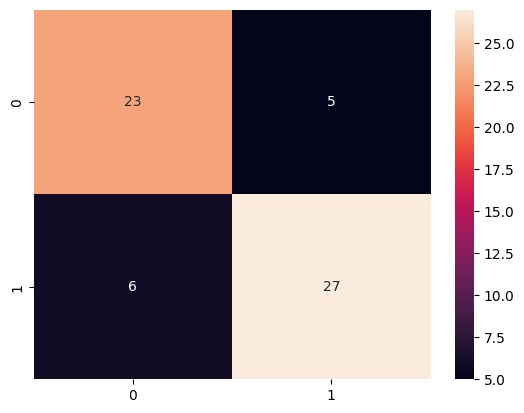

In [40]:
#plotting the confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,testing_prediction)
print(cm)
sns.heatmap(cm,annot=True)

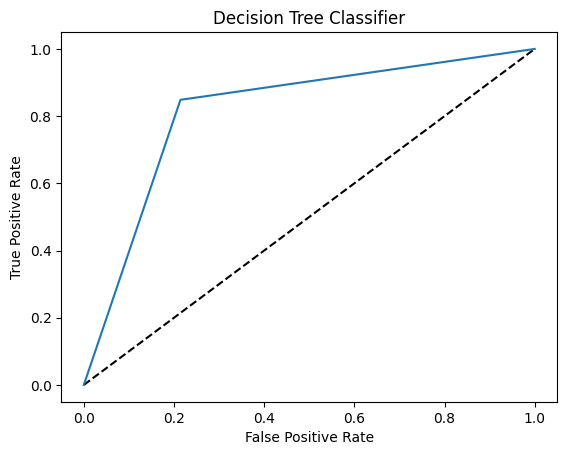

In [41]:
#roc curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
y_pred_prob=model.predict_proba(X_test)[:,1]
fpr,tpr,thresholds=roc_curve(Y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Decision Tree Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree Classifier')
plt.show()

In [42]:
#knn classifier
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()
model.fit(X_train,Y_train)

KNeighborsClassifier()

In [43]:
# Evaluation of Model using accuracy_score function from sklearn library
prediction=model.predict(X_train)
training_accuracy_score=accuracy_score(prediction,Y_train)
print(training_accuracy_score)

0.78099173553719


In [44]:
## accuracy score on testing data
prediction=model.predict(X_test)
testing_accuracy_score=accuracy_score(prediction,Y_test)
print(testing_accuracy_score)

0.6229508196721312


[[23  5]
 [ 6 27]]


<Axes: >

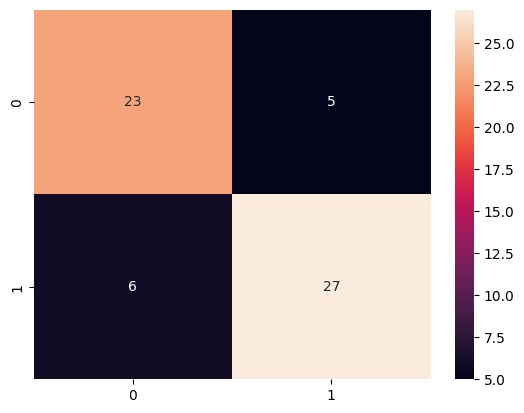

In [45]:
#plotting the confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,testing_prediction)
print(cm)
sns.heatmap(cm,annot=True)

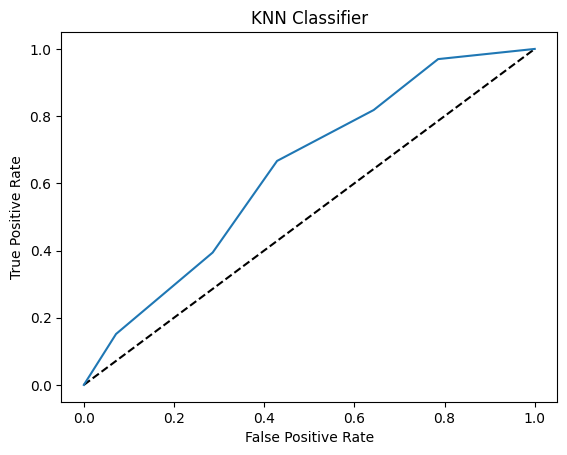

In [46]:
#roc curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
y_pred_prob=model.predict_proba(X_test)[:,1]
fpr,tpr,thresholds=roc_curve(Y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='KNN Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN Classifier')
plt.show()

In [47]:
#svm classifier
from sklearn import svm
model=svm.SVC(kernel='linear')
model.fit(X_train,Y_train)

SVC(kernel='linear')

In [48]:
# Evaluation of Model using accuracy_score function from sklearn library
prediction=model.predict(X_train)
training_accuracy_score=accuracy_score(prediction,Y_train)
print(training_accuracy_score)

0.8553719008264463


In [49]:
## accuracy score on testing data
prediction=model.predict(X_test)
testing_accuracy_score=accuracy_score(prediction,Y_test)
print(testing_accuracy_score)

0.819672131147541


[[23  5]
 [ 6 27]]


<Axes: >

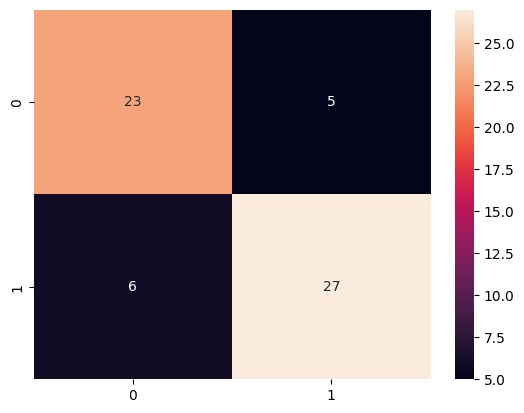

In [50]:
#plotting the confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,testing_prediction)
print(cm)
sns.heatmap(cm,annot=True)

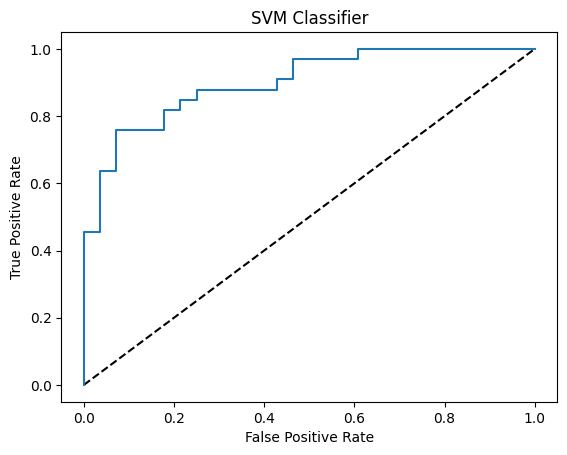

In [51]:
#roc curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
y_pred_prob=model.decision_function(X_test)
fpr,tpr,thresholds=roc_curve(Y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='SVM Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM Classifier')
plt.show()

In [52]:
#naive bayes classifier
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(X_train,Y_train)

GaussianNB()

In [53]:
# Evaluation of Model using accuracy_score function from sklearn library
prediction=model.predict(X_train)
training_accuracy_score=accuracy_score(prediction,Y_train)
print(training_accuracy_score)

0.8471074380165289


In [54]:
## accuracy score on testing data
prediction=model.predict(X_test)
testing_accuracy_score=accuracy_score(prediction,Y_test)
print(testing_accuracy_score)

0.819672131147541


[[23  5]
 [ 6 27]]


<Axes: >

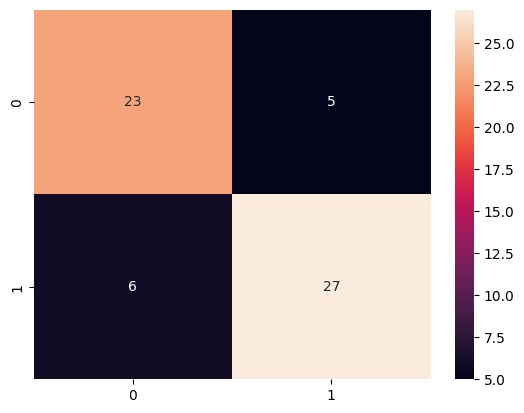

In [55]:
#plotting the confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,testing_prediction)
print(cm)
sns.heatmap(cm,annot=True)

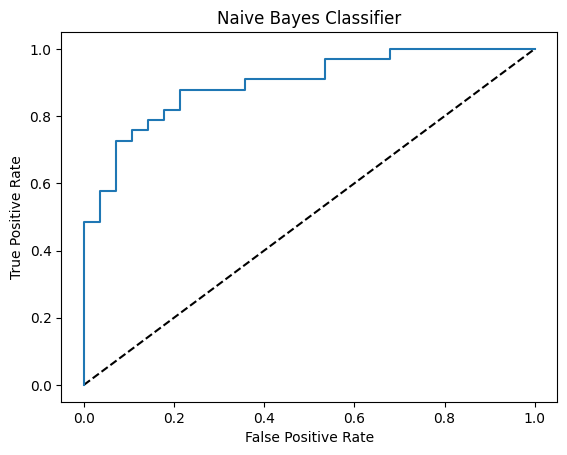

In [56]:
#roc curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
y_pred_prob=model.predict_proba(X_test)[:,1]
fpr,tpr,thresholds=roc_curve(Y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Naive Bayes Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Naive Bayes Classifier')
plt.show()

In [57]:
#gradient boosting classifier
from sklearn.ensemble import GradientBoostingClassifier
model=GradientBoostingClassifier()
model.fit(X_train,Y_train)

GradientBoostingClassifier()

In [58]:
# Evaluation of Model using accuracy_score function from sklearn library
prediction=model.predict(X_train)
training_accuracy_score=accuracy_score(prediction,Y_train)
print(training_accuracy_score)

1.0


In [59]:
## accuracy score on testing data
prediction=model.predict(X_test)
testing_accuracy_score=accuracy_score(prediction,Y_test)
print(testing_accuracy_score)

0.7377049180327869


[[23  5]
 [ 6 27]]


<Axes: >

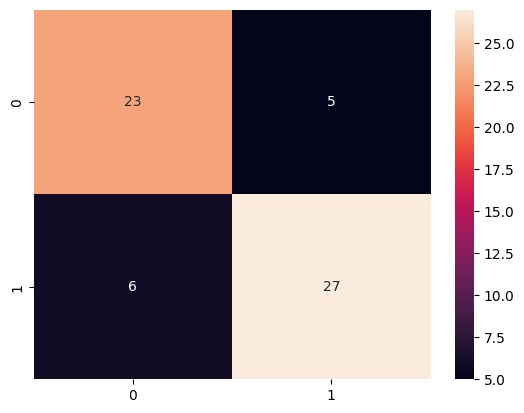

In [60]:
#plotting the confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,testing_prediction)
print(cm)
sns.heatmap(cm,annot=True)

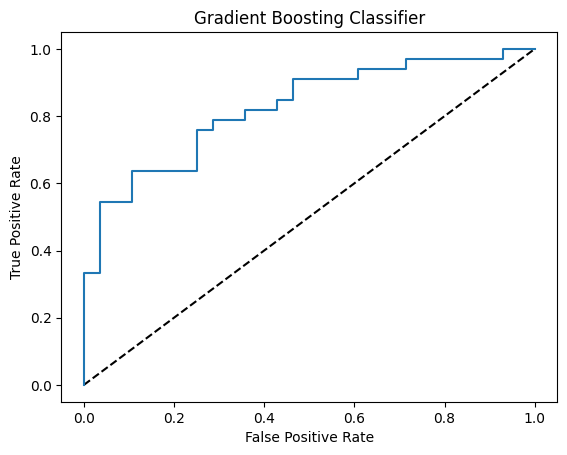

In [61]:
#roc curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
y_pred_prob=model.predict_proba(X_test)[:,1]
fpr,tpr,thresholds=roc_curve(Y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Gradient Boosting Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gradient Boosting Classifier')
plt.show()

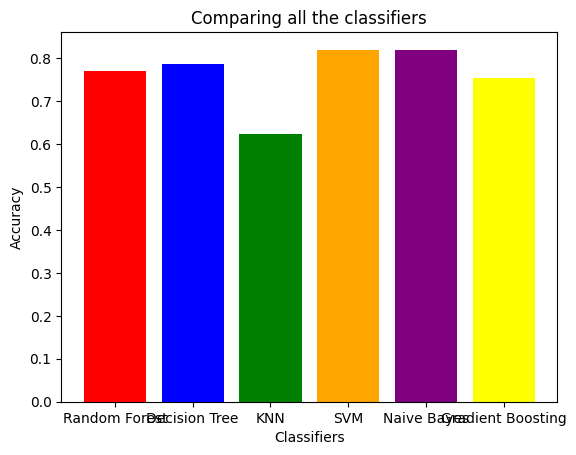

In [64]:
#comparing all the classifiers
from sklearn.model_selection import cross_val_score
models=[RandomForestClassifier(),DecisionTreeClassifier(),KNeighborsClassifier(),svm.SVC(kernel='linear'),GaussianNB(),GradientBoostingClassifier()]
#plot the accuracy of all the models in bar graph
accuracy=[]
for model in models:
    model.fit(X_train,Y_train)
    prediction=model.predict(X_test)
    accuracy.append(accuracy_score(prediction,Y_test))
#plotting the accuracy of all the models with different colors
plt.bar(['Random Forest','Decision Tree','KNN','SVM','Naive Bayes','Gradient Boosting'],accuracy,color=['red','blue','green','orange','purple','yellow'])
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.title('Comparing all the classifiers')
plt.show()
